In [1]:
import numpy as np
import torch as tr
from utils import *
from matplotlib import pyplot as plt

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
pr = 0.8
eplen = 50

TDupdate = False # 0:MC,1:TD

task = MRLBandit(eplen=eplen,banditpr=pr)
agent = ActorCritic(stsize=40,gamma=0.8,TDupdate=TDupdate)

neps = 10000
L = []
for ep in range(neps):
  expL = agent.unroll_ep(task)
  expD = unpack_expL(expL)
  agent.update(expD)
  ep_reward = expD['reward'].sum()
  L.append(ep_reward)


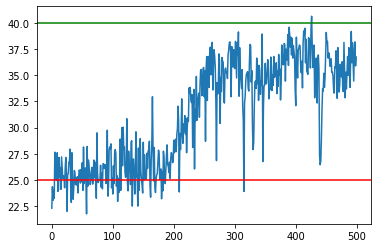

In [5]:
R = np.array(L)
R = R.reshape(-1,20).mean(1)
plt.plot(R)

plt.axhline(eplen*pr,c='g')
plt.axhline(eplen/2,c='r')